In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import crime dataset downloaded from Hue. 
crime = pd.read_csv ('CrimeExtract.csv')

In [3]:
#drop NAs and convert count type to integer
crime = crime.dropna()
crime.community_area = crime.community_area.astype(int)
crime.head()

,community_area,count
1,6,318
2,66,1658
3,72,336
4,10,301
5,67,1612


In [4]:
#download the area name - code csv from https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6
df = pd.read_csv ('CommAreas.csv')
area = pd.DataFrame(df, columns = ['AREA_NUMBE','COMMUNITY'])

area.head()

,AREA_NUMBE,COMMUNITY
0,35,DOUGLAS
1,36,OAKLAND
2,37,FULLER PARK
3,38,GRAND BOULEVARD
4,39,KENWOOD


### 10) Plot a horizontal bar chart with Community (Y axis) and Count of crimes involving children (X axis)

In [5]:
areaCrime = pd.merge(crime,area,left_on="community_area",right_on="AREA_NUMBE",how="inner")
areaCrime = areaCrime.drop(columns=['AREA_NUMBE','community_area'])
areaCrime

,count,COMMUNITY
0,318,LAKE VIEW
1,1658,CHICAGO LAWN
2,336,BEVERLY
3,301,NORWOOD PARK
4,1612,WEST ENGLEWOOD
...,...,...
72,655,ASHBURN
73,246,NORTH CENTER
74,245,MCKINLEY PARK
75,557,WEST LAWN


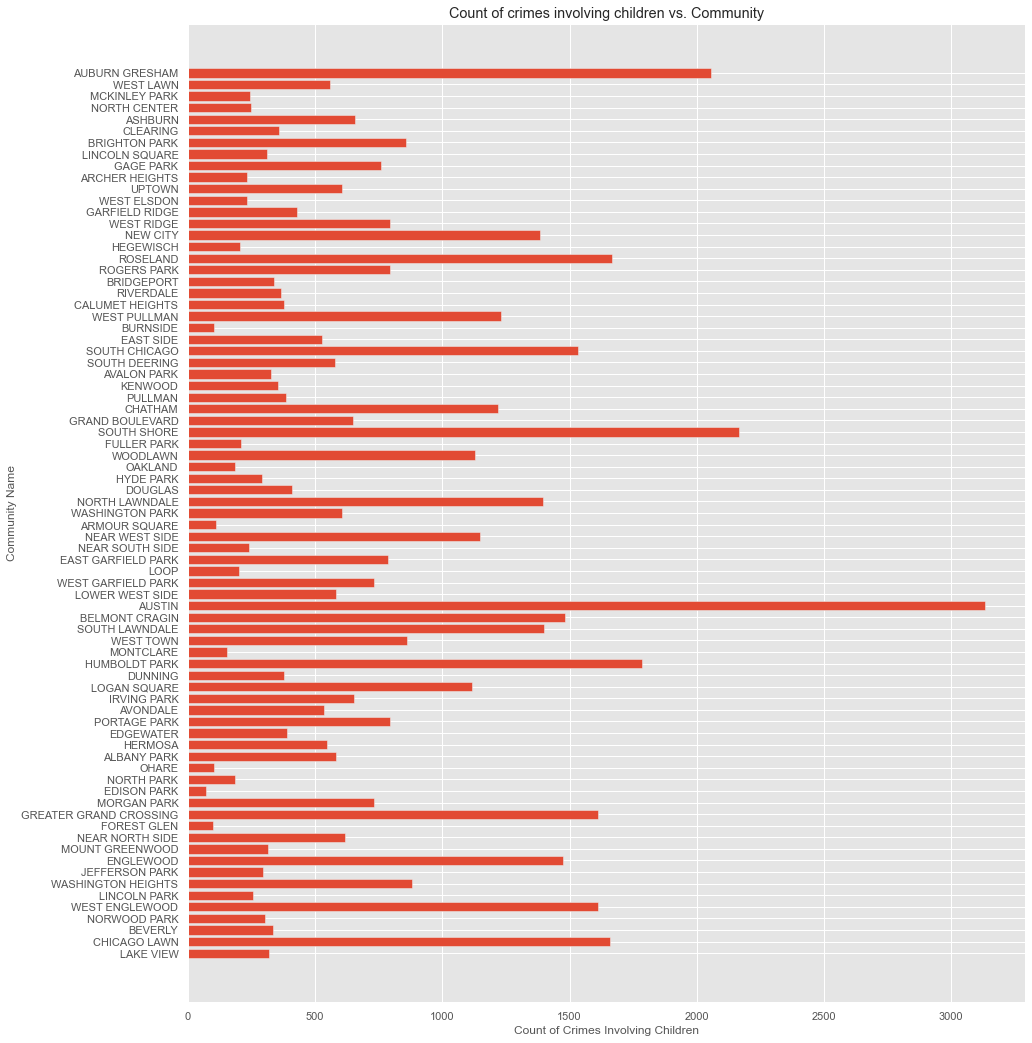

In [33]:
import matplotlib.pyplot as plt

y_axis = areaCrime['COMMUNITY']
x_axis = areaCrime['count']
plt.figure(figsize=(15,18))
plt.style.use('ggplot')
plt.barh(y_axis,x_axis)
plt.title('Count of crimes involving children vs. Community')
plt.ylabel('Community Name')
plt.xlabel('Count of Crimes Involving Children')
plt.show()

### 11. Plot a heatmap between Crime Types vs Community and Count (color/number) in each cell.

In [7]:
#import dataset downloaded from Hue. 
crimeType = pd.read_csv ('Question#5.csv')
crimeType = crimeType[(crimeType[['community_area']] != 0).all(axis=1)]
crimeType = crimeType.dropna()
crimeType.community_area = crimeType.community_area.astype(int)
crimeType.head()

,primary_type,community_area,count
42,ARSON,1,98
43,ASSAULT,1,6394
44,BATTERY,1,19540
45,BURGLARY,1,5389
46,CRIM SEXUAL ASSAULT,1,448


In [15]:
typeArea = pd.merge(crimeType,area,left_on="community_area",right_on="AREA_NUMBE",how="left")
typeArea = typeArea.drop(columns=['community_area','AREA_NUMBE'])
typeArea = typeArea[["primary_type", "COMMUNITY", "count"]]
typeArea

,primary_type,COMMUNITY,count
0,ARSON,ROGERS PARK,98
1,ASSAULT,ROGERS PARK,6394
2,BATTERY,ROGERS PARK,19540
3,BURGLARY,ROGERS PARK,5389
4,CRIM SEXUAL ASSAULT,ROGERS PARK,448
...,...,...,...
2384,ROBBERY,EDISON PARK,39
2385,SEX OFFENSE,EDISON PARK,58
2386,STALKING,EDISON PARK,8
2387,THEFT,EDISON PARK,1464


In [20]:
heatMap = typeArea.pivot("COMMUNITY", "primary_type", "count")

Text(0.5, 1.0, 'Head Map Between Crime Types vs. Community')

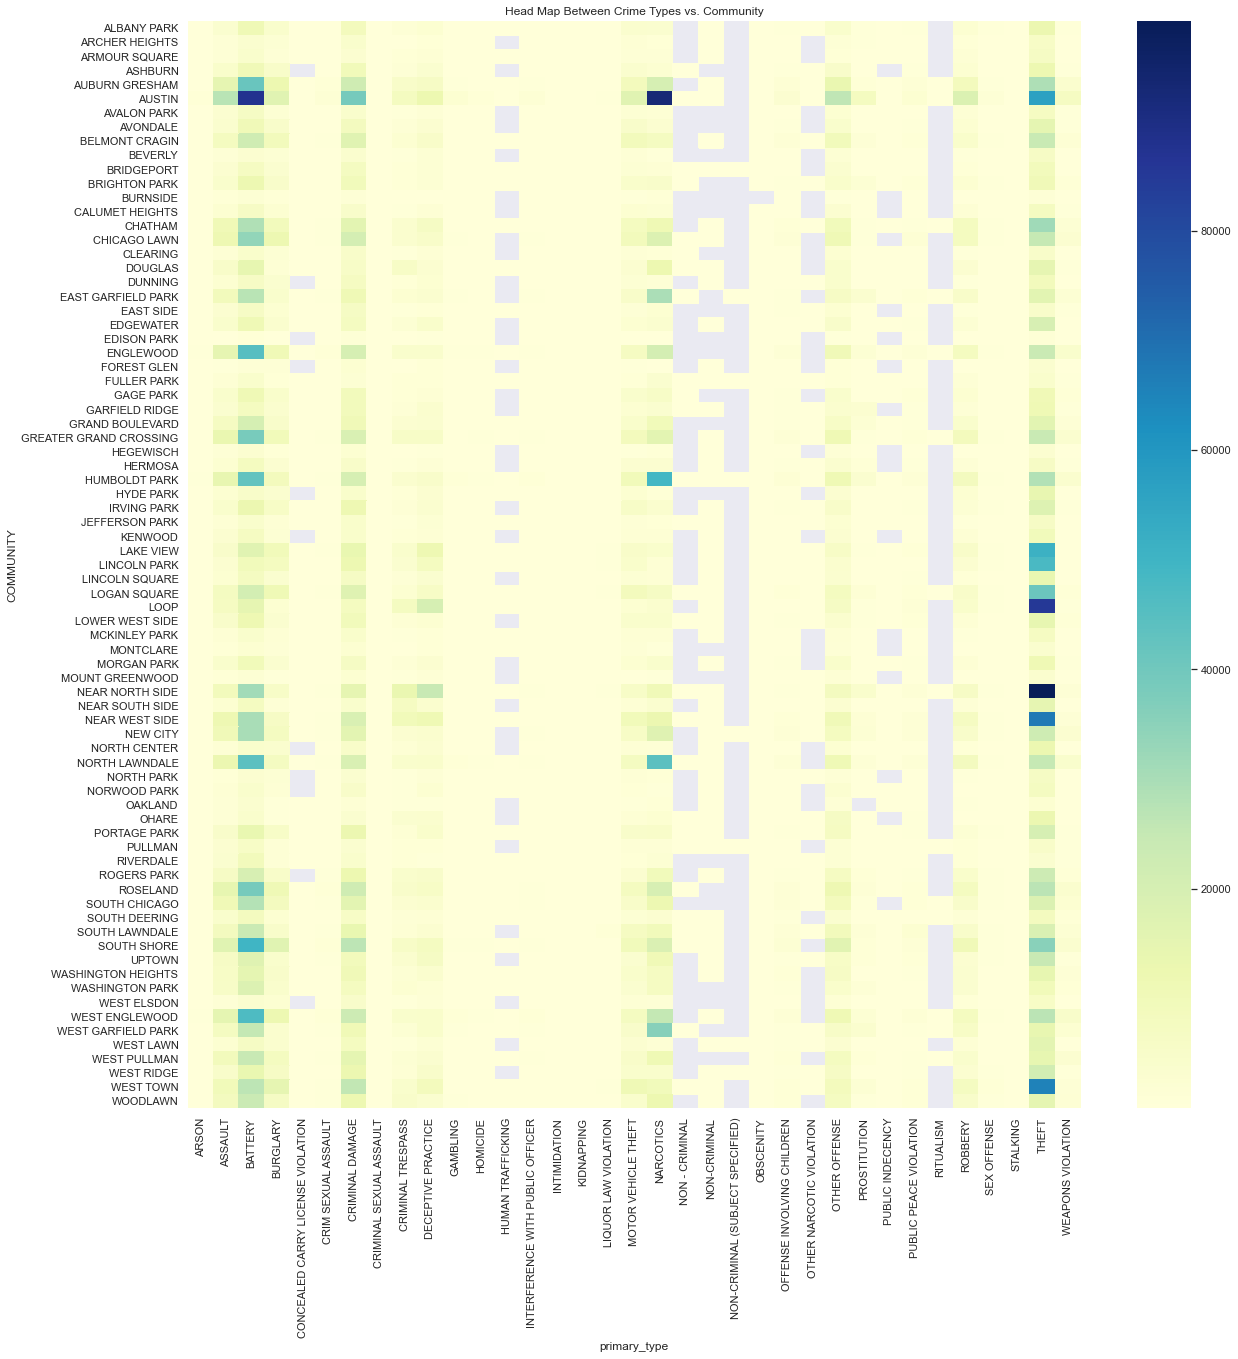

In [35]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(20,20)})

ax = sns.heatmap(heatMap,cmap="YlGnBu")
ax.set_title('Head Map Between Crime Types vs. Community')